# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Nikhil Kumar Mutyala</font>

# I. Introduction

This assignment's key goal is to be able to classify datasets, with different methods, and evaluate different methods, after drawing the decision boudnaries. For the different datasets, we use these methods by evaluating the different features. The methods we use are:

1)Pocket Algorithm
2)Linear Discriminant Analysis
3)Quadratic Discriminant Analysis
4)Logistic Regression

# II. Data

## Description

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey. The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

## Plots for Understanding or Analysis

In [77]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from itertools import *
from itertools import product

In [103]:
df=pd.read_csv('pulsar_stars.csv')

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
df = df.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

In [7]:
df.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


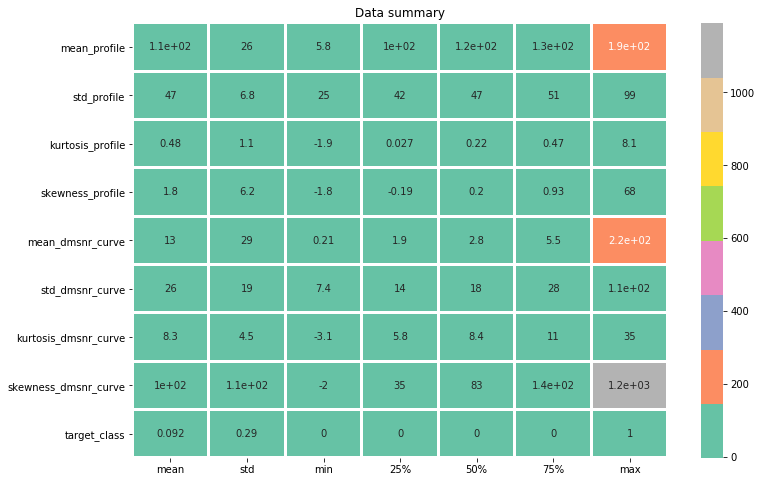

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

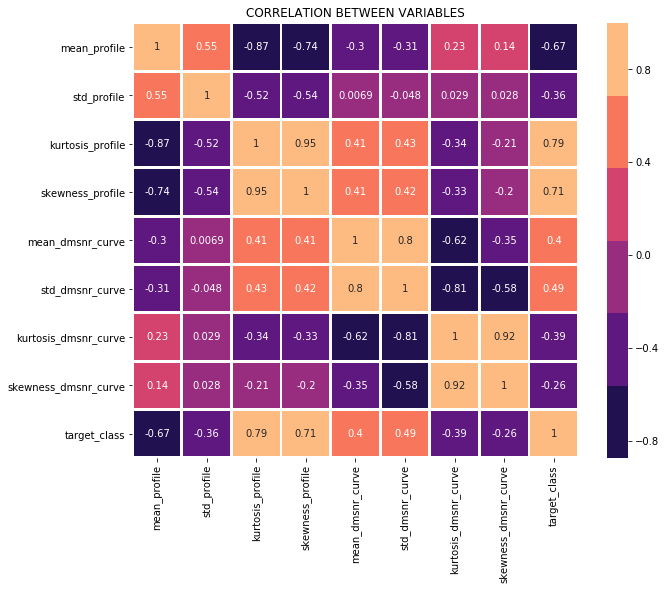

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


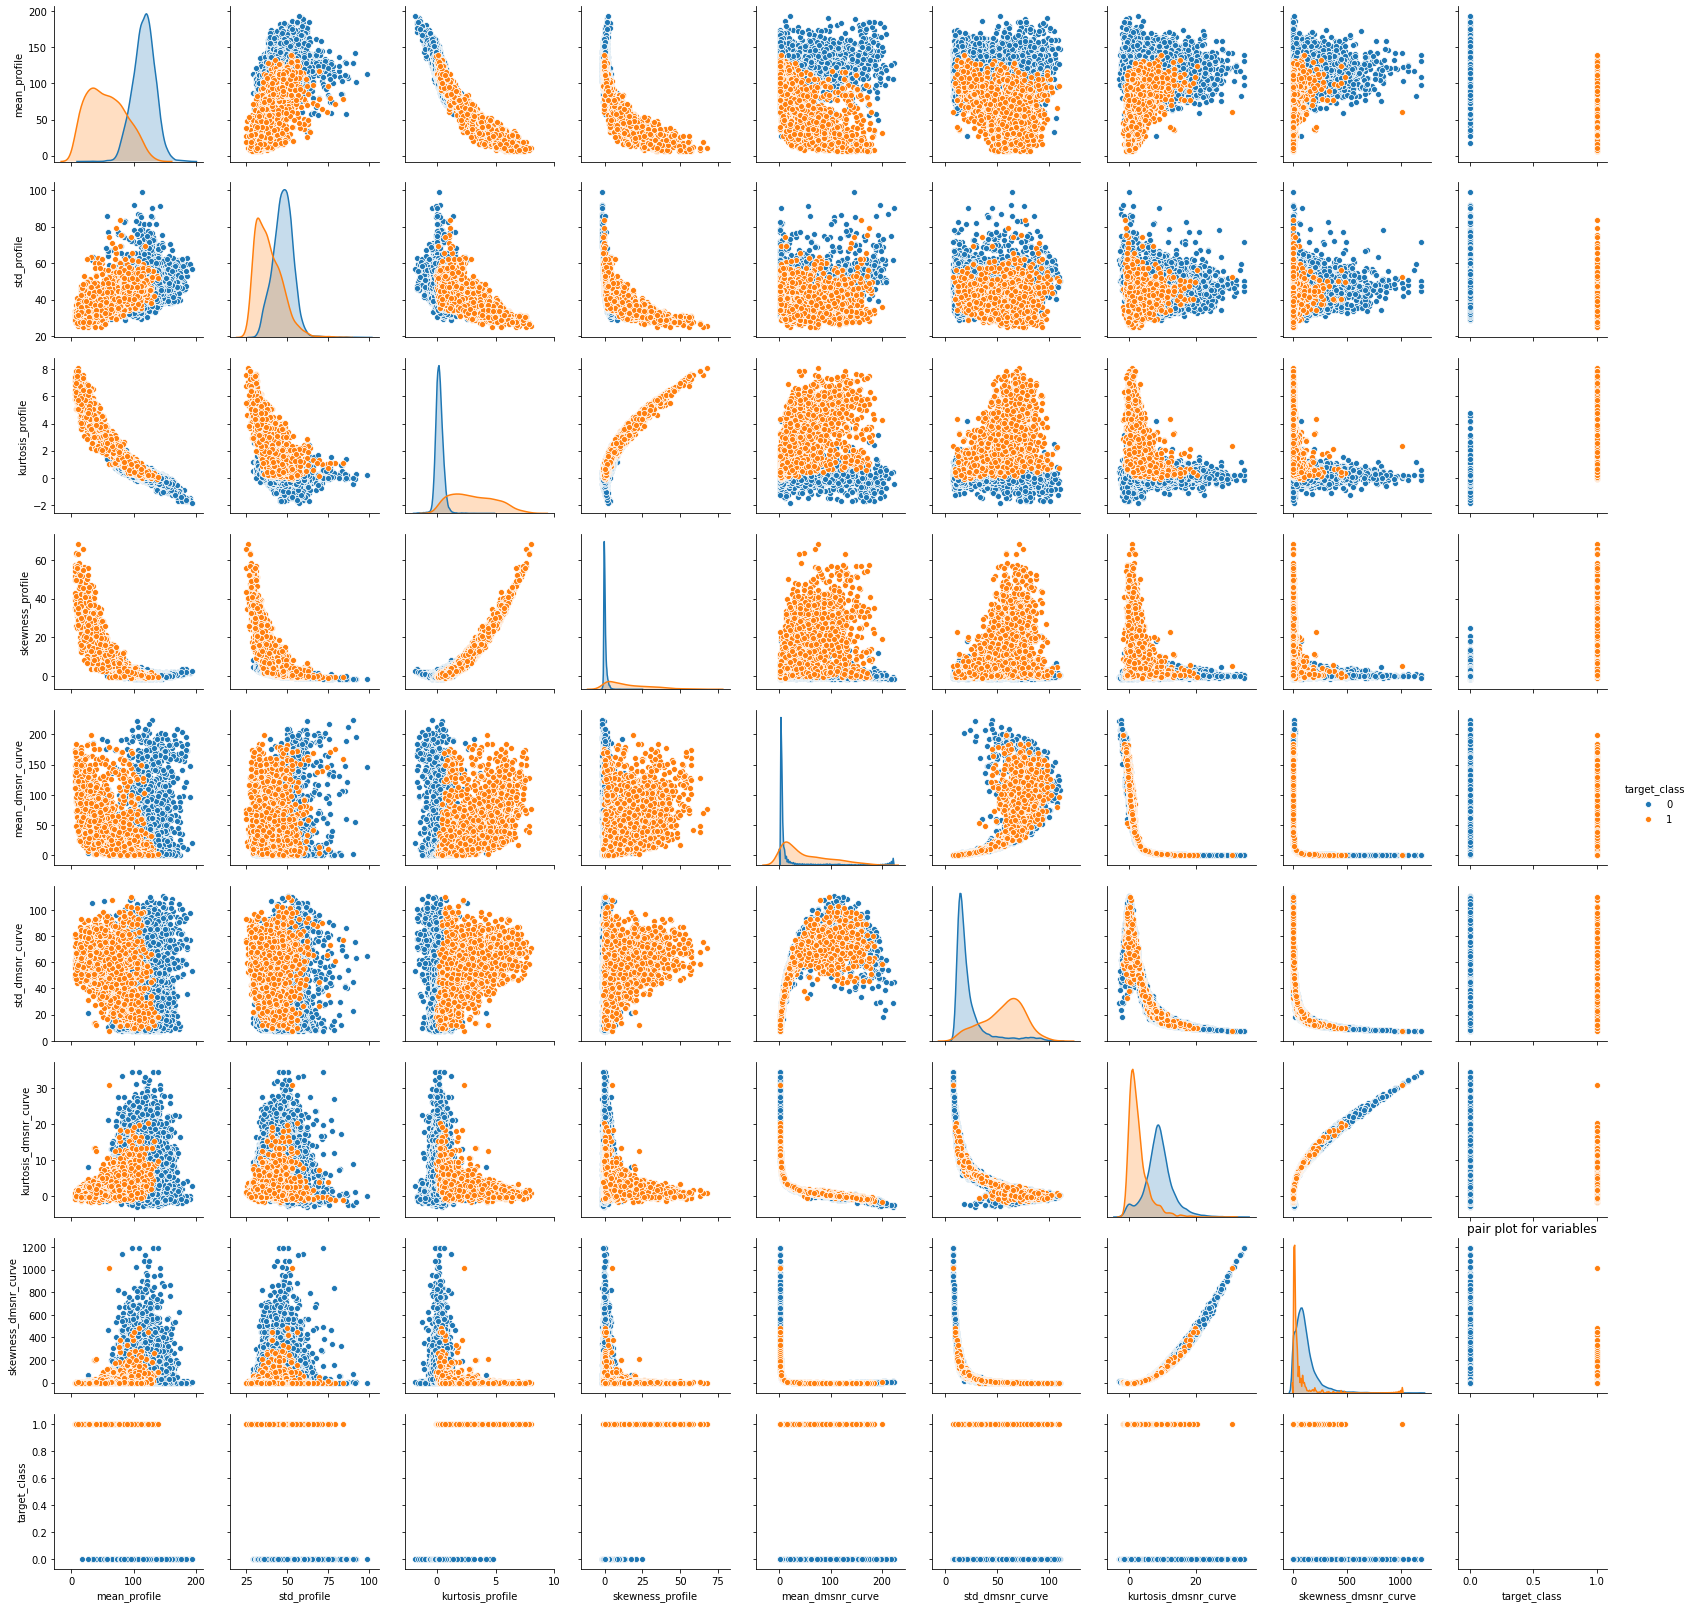

In [10]:
sns.pairplot(df,hue="target_class")
plt.title("pair plot for variables")
plt.show()

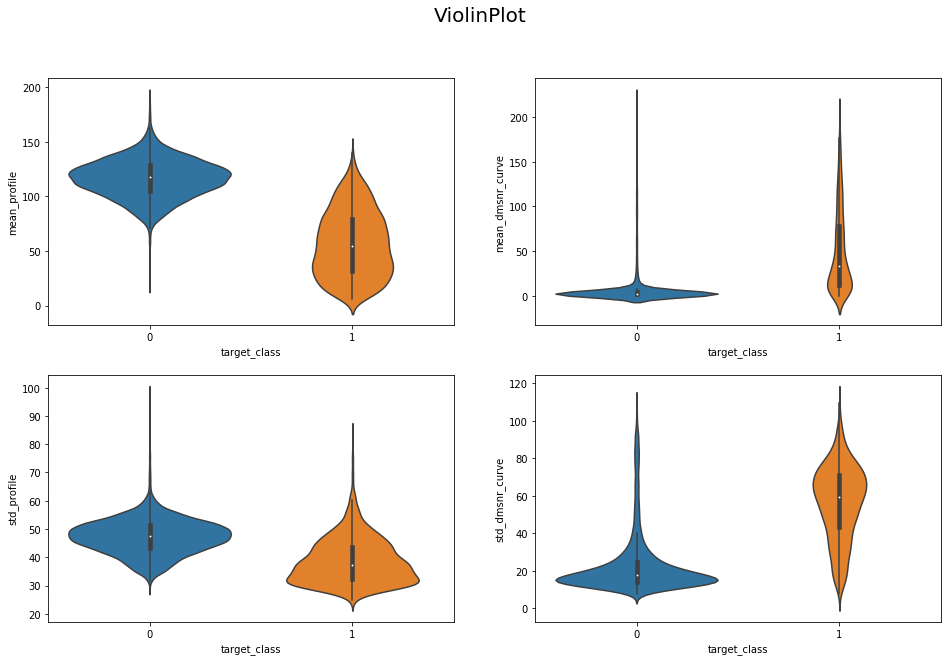

In [11]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=df,y="mean_profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=df,y="mean_dmsnr_curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=df,y="std_profile",x="target_class")
plt.subplot(2,2,4)
sns.violinplot(data=df,y="std_dmsnr_curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

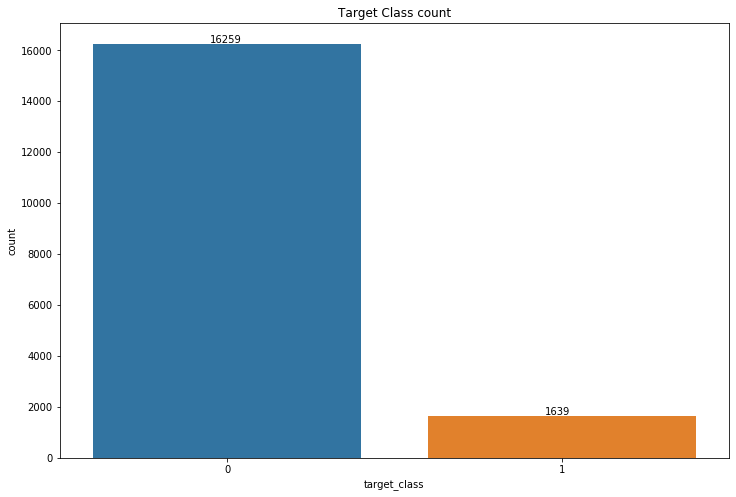

In [12]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(df['target_class'])
plot.set_title("Target Class count")
for p in plot.patches:
    plot.annotate('{}'.format(p.get_height()), xy = (p.get_x() + 0.35, p.get_height() + 40))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'scale'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


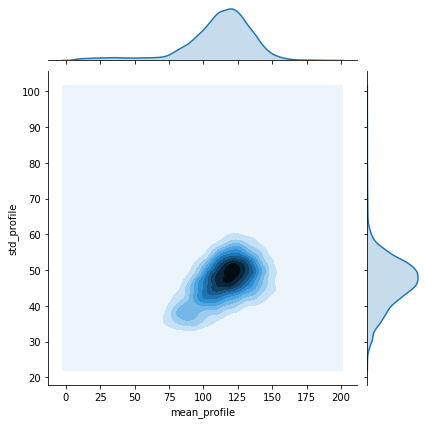

In [13]:
sns.jointplot(df["mean_profile"],df["std_profile"],kind="kde",scale=10)
plt.show()

## Preliminary Observation

1. We can see that our data is quite separable on most of the columns.
2. Most of our Columns are already related or derived from one or another. And we can see it clearly. 
3. We can see that our data has different kind of distributions which is helpful for training our models.
4. Target class mostly has '0' class than '1' class.

# III. Method

## Summary

### Pocket Algorithm

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

The pocket algorithm, uses a simple and unique method to evaluate the best convergence by keeping in store the best convergence after each iteration. Pocket however doesn't run based on number of iterations, but it rather functions on the data, and works step by step for each row in the data for one iteration, similar to the functioning of stochastic gradient descent. The algorithm used by pocket is called the perceptron algorithm, which runs a single iteration on the large, data set and rounds out the edges of the function, unlike logistic regression. The way this works is

if z >=0 , then g(z) = 1 if z < 0 , then g(z) = 0

The above algorithm for this value indicates a good accuracy in the case of a large, dataset especially when the pocket is applied and the best possible weights are well preserved. The graph of this function is somewhat different than the logistic regression function, in that it is edges out and sharper, and has categorical outputs directly.

### QDA

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions. 

**QDA Assumption:**

Different covariance for each of the response classes. For ex – σk1, σk2, σk3 for response class k1, k2, k3 etc.
Distribution of observation in each of the response class is normal with a class-specific mean (µk) and class-specific covariance (σk2).

### LDA

LDA is closely related to QDA. In LDA it is assumed that each class has same covariance matrix where as in QDA it was assumed different covariance matrix for all classes. LDA makes some assumptions data:

Each attribute has the same variance.

That the data is Gaussian. LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class. his is done by leveraging the different componenets/features of a given dataset. The method for this uses mean, covariance, scatter matrix. We compute the eigen value and eigen vectors of the different possible features we are presented with, and find out the particular features which can provide us with the best results, and use these in an n dimensional ( where n denotes the number of best features we choose to take with the highest eigenvalues). The eigenvectors of these are leveraged for this process to build a n dimensional low dimensionality data which can best suite our case.

**LDA Assumption:**

Common covariance across all response classes σ2 ( for ex σk1 = σk2 = σk3 for k1, k2 , k3 response classes )
Distribution of observation in each of the response classes is normal with a class-specific mean (µk) and common covariance σ.

### Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

The logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

In logistic regression the primary idea is to be able to use the sigmoid activation function.This function is:

g(z) = 1/1+e^-z.

### A. Super Classs Definition

In [79]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### Explanation Of Codes

Here we are creating two classes,BaseModel and Classifier. 

The baseModel has train and use defined. The train takes self,X,Y as inputs, where as use takes self,X as inputs.

The classifier is an abstract class for classification. It has attributes meanX and stdX. It contains 'init', 'normalize', 'check_matrix', 'add_ones', 'train', 'use' defined. The init initializes the class.The normalize is used for normalization of the training and testing data. We check matrices using check_matrix. Train is used for training the model.  add_ones() checks whether the matrix is 2D or not and if it is, it adds a column of 1s at the beginning of the matrix. 



### B. Pocket Algorithm


In [147]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=10
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
        
    @staticmethod  
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

### Explanation of Codes

The pocket algorithm is child class of the super class classifier. It will  implement all the abstract methods of its super class. It has two functions predict and train.

The train function is used for training the data. It takes training inputs, labels as input. For inputs and label, we perform prediction.A self learning rate(alpha) is defined.We find self weights using this learning rate, inputs and difference between label-prediction. 

The predict function takes inputs and sees if the summations is greater than 0 or not. If summation is greater than 0, then activation=1, else vise versa.

### C. QDA

In [228]:
class QuadraticDiscriminantAnalysis:

    def fit(self, X, y):
        self.labels, self.class_priors = np.unique(y, return_counts=True)
        self.class_priors = self.class_priors / y.shape[0]

        self.Cov = []
        self.Mu = []
        
        for k in range(len(self.labels)):
            X_k = X[y==self.labels[k]]
            self.Mu.append(np.mean(X_k, axis=0))
            self.Cov.append(np.cov(X_k.T))
        
    def predict(self, X):
        labels = []

        for i in range(X.shape[0]):
            labels.append(self.predict_sample(X[i]))
        
        return np.array(labels)

    def predict_sample(self, X):
        max_label = 0
        max_likelihood = 0

        for k in range(len(self.labels)):
            likelihood  = np.exp(-1/2 * (X - self.Mu[k]).T @ np.linalg.inv(self.Cov[k]) @ (X - self.Mu[k]))
            
            if likelihood > max_likelihood:
                max_label = self.labels[k]
                max_likelihood = likelihood
        
        return max_label

### Explanation of Codes

Quadratic Discriminant Analysis is child class of super class classfier. It will implement all the abstract methods. QDAfunc function is used to calculate the discriminant value for each class.

It has 3 functions defined namely fit, predict, predict_sample. Fit has self.cov where cov is Compute pairwise covariance of columns, excluding NA/null values. Compute the pairwise covariance among the series of a DataFrame. The returned data frame is the covariance matrix of the columns of the DataFrame. Both NA and null values are automatically excluded from the calculation. 

The predict appends the labels and return the labels, when predict_sample is called. The predict_sample initially sets max_label and max_likelihood to zero. If max_likelihood is less than likelihood then self_label is set as max_label and max_likelihood is set as likelihood.

### D. LDA

In [230]:
class LinearDiscriminantAnalysis:

    def fit(self, X, y):
        self.labels, self.class_priors = np.unique(y, return_counts=True)
        self.class_priors = self.class_priors / y.shape[0]

        self.cov = np.cov(X.T)
        self.Mu = []
        
        for k in range(len(self.labels)):
            X_k = X[y==self.labels[k]]
            self.Mu.append(np.mean(X_k, axis=0))
        
    def predict(self, X):
        labels = []

        for i in range(X.shape[0]):
            labels.append(self.predict_sample(X[i]))
        
        return np.array(labels)

    def predict_sample(self, X):
        max_label = 0
        max_likelihood = 0

        for k in range(len(self.labels)):
            likelihood  = np.exp(-1/2 * (X - self.Mu[k]).T @ np.linalg.inv(self.cov) @ (X - self.Mu[k]))
            
            if likelihood > max_likelihood:
                max_label = self.labels[k]
                max_likelihood = likelihood
        
        return max_label

### Explanation of Codes

LDA algorithm abo ve is child class of Super class Classifier. Hence it will implement the abstract methods. LDAfunc function is used to calculate the discriminant value.

It has 3 functions defined namely fit, predict, predict_sample. Fit has self.cov where cov is Compute pairwise covariance of columns, excluding NA/null values. Compute the pairwise covariance among the series of a DataFrame. The returned data frame is the covariance matrix of the columns of the DataFrame. Both NA and null values are automatically excluded from the calculation. 

The predict appends the labels and return the labels, when predict_sample is called. The predict_sample initially sets max_label and max_likelihood to zero. If max_likelihood is less than likelihood then self_label is set as max_label and max_likelihood is set as likelihood.

In [233]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['status']=t
        X1=new_df[new_df.status == -1.0]
        X1=X1.drop(['status'],axis=1)
        X2=new_df[new_df.status == 1.0]
        X2=X2.drop(['status'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(tt.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

In [234]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['status']=t
        X1=new_df[new_df.status == -1.0]
        X1=X1.drop(['status'],axis=1)
        X2=new_df[new_df.status == 1.0]
        X2=X2.drop(['status'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

### E. Logistic Regression

In [168]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10000
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### Explanation Of Codes

Logistic regression algorithm above is child class of Super class Classifier. Hence it will implement the abstract methods. It has train and use function.

Train function will takes input matrices X and T.
It calculates values of D and K. D=number of features, K = number of unique classes in T
use() function takes test data X as input.
It normalizes it and add ones column to X.
It calculates output variable using sigmoid function on dot product of Xs and weights matrix.
Sigmoidfunc generalizes sigmoid function


# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Discussion about evaluation metrics

### Confusion matrix

A confusion matrix is a technique for summarizing the performance of a classification algorithm

How to evaluate a machine learning model is critical for the choice of right tools and performance. For various reason, there are several classification measurements to meet different needs for practical applications. In this assignment, we examine popular measures.
One naive evaluation we can think of is the rate or percentage or correct classification.


### Precision, Recall and Specificity 

Precision: The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct. 
      
    precision=TP/(TP+FP)

Recall (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 
    
    recall=TP/(TP+FN)

Specificity (True Negative Rate): Considering imblance or difference in class, we consider TNR as well.
    
    specificity=TN/(TN+FP)

### F1 Score

For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall.


### ROC Curve

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). As in the figure below, starting from the boundary (or threshold) with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas. When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR.

### AUC-ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

## Discussion about training and test accuracies

Accuracy: The amount of correct classifications / the total amount of classifications.
The train accuracy: The accuracy of a model on examples it was constructed on.
The test accuracy is the accuracy of a model on examples it hasn't seen.
Confusion matrix: A tabulation of the predicted class (usually vertically) against the actual class (thus horizontally).

training accuracy is usually the accuracy you get if you apply the model on the training data, while testing accuracy is the accuracy for the testing data. It's sometimes useful to compare these to identify overtraining. 

Accuracy for train data, linear regression is 0.092<br>
F1 score for train data, linear regression is 0.168<br>

Accuracy of train data for pocket algorithm is 0.907<br>
Accuracy of test data for pocket algorithm is 0.911<br>

Accuracy of train data for LDA is 0.091<br>
F1 score of train data for LDA is 0.168<br>

Accuracy of test data for LDA is 0.090<br>
F1 score of test data for LDA is 0.165<br>

roc_auc_score for LDA is 0.5<br>

**rounded off to 3decimals**

## Plots for Results

### Linear Regression

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [180]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
scaler = StandardScaler()
x_train, x_test, y_train, y_test = model_selection.train_test_split(df,t,test_size=0.20,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [185]:
lr = Logistic(0.0001)
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.09205196256460399
F1 score: 0.16858531593757994


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


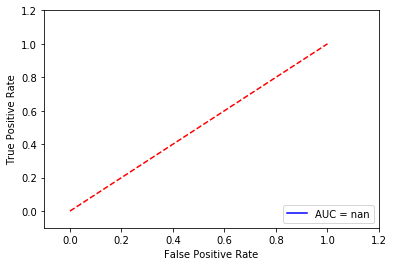

In [210]:
import numpy as np
 from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, ypred_lr_test)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Pocket Algorithm

In [214]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(df,t,test_size=0.30,random_state=40)

In [215]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [216]:
p=Pocket()
p.train(X_train,y_train)

# Prediction on train set
ypred_train=p.use(X_train)

# Prediction on test set
ypred_p=p.use(X_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


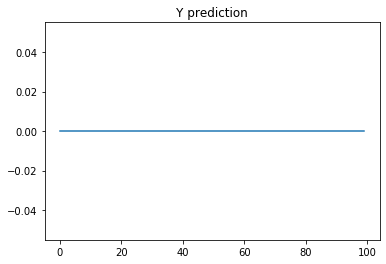

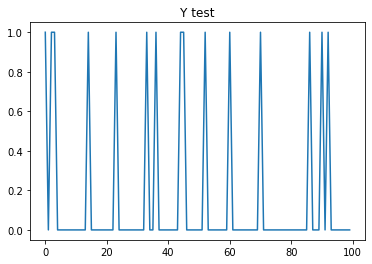

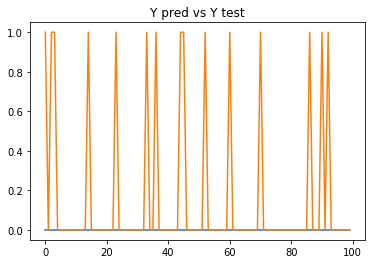

In [217]:
plt.title("Y prediction")
plt.plot(ypred_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_p[0:100])
plt.plot(y_test[0:100])
plt.show()

In [224]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy of train data:', accuracy_score(y_train,ypred_train))
print('Accuracy of test data:', accuracy_score(y_test,ypred_p))


Accuracy of train data: 0.907088122605364
Accuracy of test data: 0.9115456238361266


### QDA

In [235]:
from sklearn import model_selection
from sklearn.metrics import r2_score
t=df.iloc[:,-1]
X_train,X_test,y_train,y_test = model_selection.train_test_split(df,t,test_size=0.20,random_state=40)

In [236]:
# Training
q=QDA1()
q.train(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### LDA

In [241]:
l=LDA1()
l.train(X_train,y_train)

In [242]:
ypred_lda_train,d1,d2=l.use(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [243]:
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.09191227825115239
F1 score: 0.16835102980683125


In [244]:
ypred_lda_test,d1,d2=l.use(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [246]:
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.09022346368715084
F1 score: 0.1655137074045606


In [252]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, ypred_lr_test)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

In [253]:
roc_auc_score(y_test, ypred_lda_test)

0.5

In [254]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

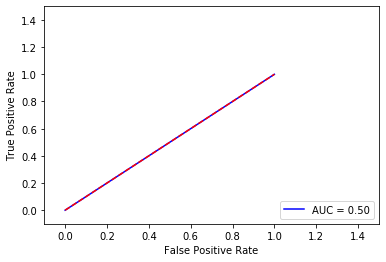

In [255]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classification and Model Comparison

The purpose of the learning rule is to train the network to perform some task. ... The learning rule is then used to adjust the weights and biases of the network in order to move the network outputs closer to the targets. A single perceptron can only be used to implement linearly separable functions. It takes both real and boolean inputs and associates a set of weights to them, along with a bias. The hypothesis in logistic regression provides a measure of uncertainty in the occurrence of a binary outcome based on a linear model.  The output is bounded asymptotically between 0 and 1, and depends on a linear model. The perceptron classification algorithm is a more basic procedure, based on dot products between examples and weights. Whenever an example is misclassified the sign of the dot product is at odds with the classification value (−1 and 1) in the training set. 

LDA (Linear Discriminant Analysis) is used when a linear boundary is required between classifiers and QDA (Quadratic Discriminant Analysis) is used to find a non-linear boundary between classifiers. LDA and QDA work better when the response classes are separable and distribution of X=x for all class is normal. Logistic regression is a classification algorithm traditionally limited to only two-class classification problems (i.e. default = Yes or No). However, if you have more than two classes then Linear (and Quadratic) Discriminant Analysis (LDA & QDA) is an often-preferred classification technique. Discriminant analysis models the distribution of the predictors X separately in each of the response classes (i.e. default = “Yes”, default = “No” ), and then uses Bayes’ theorem to flip these around into estimates for the probability of the response category given the value of X.

If n is small and the distribution of the predictors X is approximately normal in each of the classes, the LDA & QDA models are again more stable than the logistic regression model. LDA & QDA are often preferred over logistic regression when we have more than two non-ordinal response classes. It is always good to compare the results of different analytic techniques; this can either help to confirm results or highlight how different modeling assumptions and characterstics uncover new insights.

It is always good to compare the results of different analytic techniques; this can either help to confirm results or highlight how different modeling assumptions and characterstics uncover new insights. 

# Conclusions

Here for this dataset, pocket model has worked very well on comparing with other models. It has achieved very good evaluation scores considering AUC score, F1 score. Here AUC score, F1 are used for evaluation. Also, I was able to understand the working of this model more clearly by coding without using libraries and understanding the math (Stats and Probability) behind the models. This assignment helped me evaluate a model based on their  evaluation metrics which gives us better view of how a model is performing. I have learnt how the algorithms works, instead of blindly using the inbuilt functions. Comparing with functions and algorithm i got to know how much I can improvise to write an algorithm. The better we practice,the better we can write algorithms.

# References

1. https://codesachin.wordpress.com/2015/08/25/linear-and-quadratic-discriminant-analysis-for-ml-statistics-newbies/
2. https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star
3. https://en.wikipedia.org/wiki/Perceptron#Variants
4. https://machinelearningmastery.com/logistic-regression-for-machine-learning/
5. https://thatdatatho.com/2018/02/12/linear-vs-quadratic-discriminant-analysis/
6. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign2.ipynb 

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)